In [103]:
import numpy as np
import pandas as pd


In [129]:
data = pd.read_csv('./../../communal/Ames_Housing_Price_Data_cleaned_2.csv')

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [131]:
data.head()
predict = data.SalePrice
log_predict = np.log(predict)
data.drop('SalePrice', axis = 1, inplace = True)

data.drop(['PID', 'lot_bucket', 'mean_LotFrontage', 'Prop_Addr', 'GarageYrBlt', 'lat', 'long'], axis = 1, inplace = True)

data.drop(['YearRemodAdd', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
           'TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)
data['Total_Porch'] = data['OpenPorchSF'] + data['EnclosedPorch'] + \
                      data['3SsnPorch'] + data['ScreenPorch']
data.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],
           axis = 1, inplace = True)
data.drop([115, 132, 141, 335, 490, 538, 2047, 2239], inplace = True)
log_predict.drop([115, 132, 141, 335, 490, 538, 2047, 2239], inplace = True)
data.reset_index()
log_predict.reset_index()


,index,SalePrice
0,0,11.744037
1,1,11.845820
2,2,11.845820
3,3,11.735269
4,4,11.643954
...,...,...
2611,2619,11.703546
2612,2620,11.846536
2613,2621,11.884489
2614,2622,12.289954


In [132]:
dummy = pd.get_dummies(data, drop_first = True)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(dummy,log_predict)

In [134]:
lr = LinearRegression()

In [135]:
lr.fit(X_train, y_train)

LinearRegression()

In [136]:
lr.score(X_train, y_train)

0.9411254861909345

In [137]:
lr.score(X_test, y_test)

0.9035975303619525

In [138]:
train = []
test = []
for i in range(1000):
    print(i,end = '\r')
    np.random.seed(i)
    X_train, X_test, y_train, y_test = train_test_split(dummy,log_predict)
    lr.fit(X_train, y_train)
    train.append(lr.score(X_train, y_train))
    test.append(lr.score(X_test, y_test))

<AxesSubplot:ylabel='Count'>

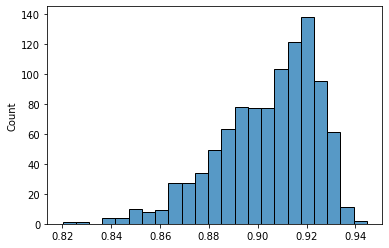

In [139]:
import seaborn as sns
# sns.histplot(train)
sns.histplot(test)

In [140]:
len(dummy.columns)

236

In [141]:
def calc_vif(data):
    vif = {}
    for feature in data.columns:
        X = [f for f in data.columns if f != feature]
        X = data[X]
        y = data[feature]
        r2 = LinearRegression().fit(X,y).score(X,y)
        vif[feature] = 1/(1-r2)
    return pd.DataFrame.from_dict([vif]).T.sort_values(ascending = False, by = 0)

In [142]:
vifs = calc_vif(dummy)

<ipython-input-141-f4cd699cb351>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(1-r2)
<ipython-input-141-f4cd699cb351>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(1-r2)
<ipython-input-141-f4cd699cb351>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(1-r2)
<ipython-input-141-f4cd699cb351>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(1-r2)
<ipython-input-141-f4cd699cb351>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(1-r2)
<ipython-input-141-f4cd699cb351>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(1-r2)
<ipython-input-141-f4cd699cb351>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif[feature] = 1/(1-r2)


In [143]:
pd.set_option('display.max_columns', None)

In [144]:
vifs.T

,BsmtCond_None,GarageQual_None,GarageType_None,GarageCond_None,GarageFinish_None,BsmtQual_None,BsmtFinType1_None,GarageQual_TA,GarageCond_TA,RoofStyle_Gable,RoofStyle_Hip,BsmtCond_TA,GarageQual_Fa,BsmtFinType2_None,MiscFeature_None,MiscFeature_Shed,PoolArea,MSZoning_RL,GarageCond_Fa,Heating_GasA,GarageType_Attchd,BsmtCond_Gd,MasVnrType_None,BsmtExposure_None,MSZoning_RM,ExterCond_TA,SaleType_New,SaleCondition_Partial,MSSubClass,MasVnrType_BrkFace,BsmtCond_Fa,GarageType_Detchd,FireplaceQu_None,Heating_GasW,ExterCond_Gd,Neighborhood_NAmes,Exterior1st_VinylSd,ExterQual_TA,Neighborhood_OldTown,MSZoning_FV,GarageQual_Gd,ExterQual_Gd,FireplaceQu_Gd,FireplaceQu_TA,Exterior1st_HdBoard,BldgType_TwnhsE,PoolQC_Gd,PoolQC_Fa,Exterior1st_MetalSd,Neighborhood_CollgCr,Neighborhood_Somerst,Exterior1st_Wd Sdng,YearBuilt,PoolQC_None,KitchenQual_TA,Functional_Typ,BsmtQual_TA,Neighborhood_Edwards,MasVnrType_Stone,GarageCond_Gd,GarageType_BuiltIn,Condition2_Norm,KitchenQual_Gd,Neighborhood_Sawyer,GarageCond_Po,GrLivArea,Neighborhood_Gilbert,Heating_Grav,Neighborhood_BrkSide,BldgType_Twnhs,HouseStyle_1Story,Neighborhood_NWAmes,Exterior1st_Plywood,Neighborhood_IDOTRR,PoolQC_TA,BldgType_2fmCon,Neighborhood_NridgHt,ExterCond_Fa,BsmtQual_Gd,BsmtFinType2_Unf,Neighborhood_SawyerW,Foundation_PConc,Neighborhood_Mitchel,Neighborhood_Crawfor,Heating_Wall,Fireplaces,TotalBsmtSF,Condition2_Feedr,Foundation_CBlock,Functional_Min2,Exterior1st_CemntBd,RoofStyle_Gambrel,HouseStyle_2Story,BldgType_Duplex,Neighborhood_NoRidge,Condition1_Norm,Functional_Min1,Fence_None,Neighborhood_MeadowV,OverallQual,KitchenAbvGr,Neighborhood_SWISU,SaleType_WD,Neighborhood_Timber,Exterior1st_BrkFace,MiscVal,GarageQual_Po,RoofStyle_Mansard,Neighborhood_BrDale,Fence_MnPrv,Neighborhood_ClearCr,Neighborhood_StoneBr,FullBath,FireplaceQu_Fa,GarageFinish_Unf,Foundation_Slab,RoofMatl_Tar&Grv,Heating_OthW,MSZoning_RH,BsmtFinType1_Unf,BsmtFinType1_GLQ,LandContour_Lvl,Functional_Mod,GarageArea,BsmtExposure_No,SaleCondition_Normal,Condition1_Feedr,MiscFeature_TenC,LotArea,LotFrontage,BsmtFinType2_Rec,HouseStyle_SLvl,Exterior1st_WdShing,MasVnrArea,BsmtFinType2_LwQ,RoofStyle_Shed,GarageType_Basment,HalfBath,BsmtQual_Fa,Neighborhood_NPkVill,ExterQual_Fa,BedroomAbvGr,FireplaceQu_Po,Neighborhood_Veenker,LandSlope_Sev,MiscFeature_Othr,LandContour_HLS,Alley_None,HouseStyle_SFoyer,KitchenQual_Fa,PavedDrive_Y,Condition2_PosN,Exterior1st_Stucco,BsmtFinType2_BLQ,Condition2_PosA,Alley_Pave,BsmtCond_Po,LandContour_Low,Condition2_RRAe,BsmtFullBath,Fence_GdWo,CentralAir_Y,HeatingQC_TA,OverallCond,Condition1_RRAn,GarageFinish_RFn,BsmtExposure_Gd,BsmtFinType1_Rec,Neighborhood_Blueste,BsmtExposure_Mn,Condition2_RRNn,BsmtFinType2_GLQ,Condition1_PosN,BsmtFinType1_BLQ,LotConfig_Inside,MSZoning_I (all),LandSlope_Mod,LotConfig_CulDSac,SaleType_ConLD,Condition1_RRAe,GarageType_CarPort,HeatingQC_Fa,Functional_Maj2,Electrical_SBrkr,Neighborhood_Greens,BsmtFinType1_LwQ,LotShape_Reg,PavedDrive_P,Utilities_NoSewr,Street_Pave,HeatingQC_Gd,RoofMatl_Membran,Condition1_PosA,Electrical_FuseF,RoofMatl_Metal,Total_Porch,Condition2_RRAn,HouseStyle_2.5Unf,SaleCondition_Family,WoodDeckSF,SaleCondition_AdjLand,ExterCond_Po,HouseStyle_2.5Fin,LotConfig_FR2,Exterior1st_BrkComm,HouseStyle_1.5Unf,SaleType_CWD,Electrical_FuseP,RoofMatl_WdShake,SaleType_ConLw,RoofMatl_WdShngl,BsmtHalfBath,Condition1_RRNn,LotShape_IR2,Functional_Sal,SaleType_Con,SaleType_ConLI,Foundation_Stone,SaleCondition_Alloca,Exterior1st_PreCast,Neighborhood_GrnHill,HeatingQC_Po,LotShape_IR3,Exterior1st_AsphShn,Fence_MnWw,SaleType_Oth,Exterior1st_CBlock,Foundation_Wood,Condition1_RRNe,YrSold,Neighborhood_Landmrk,MoSold,RoofMatl_Roll,LotConfig_FR3,Exterior1st_ImStucc,SaleType_VWD
0,inf,inf,inf,inf,inf,inf,inf,188.048176,146.857847,108.019367,102.158982,87.057096,83.156669,73.547788,70.550313,58.081626,57.994903,48.980157,47.117188,43.388154,38.45857,36.614461,36.012728,35.846782,34.53731,33.446307,32.958312,32.675453,32.417815,32.295251,32.291827,31.750408,28.908938,28.04

In [145]:
np.mean(train)

0.9412470303452652

In [146]:
np.mean(test) 

0.9041133770006702

In [167]:
residuals = np.exp(y_test) - np.exp(lr.predict(X_test))

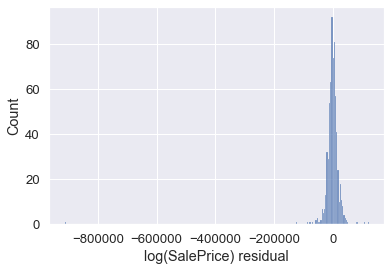

In [168]:
sns.set(font_scale = 1.2)
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel('log(SalePrice) residual')


plt.savefig('VANILLA_LR_residuals.png',dpi = 300,bbox_inches = 'tight')


In [169]:
residuals[abs(residuals) > .5]

945      2974.009641
834    -17470.310894
413     39953.196564
1335    -7362.055953
2529    -4163.719940
            ...     
841     46715.832153
1432   -28623.146074
42       3371.672921
564     -1133.557498
2013     2519.998059
Name: SalePrice, Length: 654, dtype: float64

In [150]:
data.iloc[315].to_frame().T

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_Porch
318,1720,60,RL,62.0,8244,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2004,Gable,CompShg,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,Unf,840.0,GasA,Ex,Y,SBrkr,0.0,0.0,2,1,3,1,Gd,Typ,1,Gd,Attchd,Fin,440.0,TA,TA,Y,100,0,None,None,None,0,5,2007,WD,Normal,48


In [151]:
log_predict[315]

12.126758838810447

In [152]:
lr.predict([dummy.iloc[315]])

array([12.17599499])

In [170]:
np.mean(residuals)

-1349.9528379444191

In [166]:
np.exp(residuals)

945     1.018585
834     0.919145
413     1.080706
1335    0.979960
2529    0.942302
          ...   
841     1.470527
1432    0.839757
42      1.026785
564     0.993453
2013    1.015510
Name: SalePrice, Length: 654, dtype: float64

In [171]:
r = np.exp(log_predict)

In [172]:
r.max()

754999.9999999999

In [173]:
r.min()

12788.999999999996

In [174]:
np.mean(r)

178005.97400611622